In [3]:
import numpy as np

# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward pass: compute prediction and cost
def forward(params, X, Y):
    w = params["w"]
    w_0 = params["w_0"]
    n = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + w_0)
    cost = (-1 / n) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    return A, cost

# Backward pass: compute gradients
def backprop(X, Y, A):
    n = X.shape[1]

    dw = (1 / n) * np.dot(X, (A - Y).T)
    dw_0 = (1 / n) * np.sum(A - Y)

    return dw, dw_0

# Optimization loop
def optimize(params, X, Y, num_iterations, l_rate):
    costs = []

    for i in range(num_iterations):
        A, cost = forward(params, X, Y)
        dw, dw_0 = backprop(X, Y, A)

       


        params["w"] -= l_rate * dw
        params["w_0"] -= l_rate * dw_0

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}, dw = {np.linalg.norm(dw):.4f}, dw_0 = {dw_0:.4f}")

        costs.append(cost)

    return params, costs

# Data: two points (1,1)->0 (cat), (3,3)->1 (dog)
X = np.array([[1, 3],
              [1, 3]])  # shape (2, 2)
Y = np.array([[0, 1]])  # shape (1, 2)

# Initialize weights and bias
w = np.random.randn(2, 1)
w = w / np.linalg.norm(w)  # OK only at initialization
params = {
    "w": w,
    "w_0": 0.0
}

# Train model
trained_params, cost_history = optimize(params, X, Y, num_iterations=1000, l_rate=0.1)

# Final parameters
print("\nFinal weights and bias:")
print("w =", trained_params["w"].flatten())
print("w_0 =", trained_params["w_0"])

Iteration 0: Cost = 1.6602, dw = 1.8236, dw_0 = -0.3391
Iteration 100: Cost = 0.3551, dw = 0.0417, dw_0 = 0.1288
Iteration 200: Cost = 0.2270, dw = 0.0296, dw_0 = 0.0886
Iteration 300: Cost = 0.1619, dw = 0.0223, dw_0 = 0.0656
Iteration 400: Cost = 0.1242, dw = 0.0176, dw_0 = 0.0514
Iteration 500: Cost = 0.1000, dw = 0.0145, dw_0 = 0.0420
Iteration 600: Cost = 0.0834, dw = 0.0122, dw_0 = 0.0353
Iteration 700: Cost = 0.0713, dw = 0.0106, dw_0 = 0.0304
Iteration 800: Cost = 0.0622, dw = 0.0093, dw_0 = 0.0267
Iteration 900: Cost = 0.0551, dw = 0.0083, dw_0 = 0.0237

Final weights and bias:
w = [2.05695757 1.04119356]
w_0 = -5.695415767366481


‣ ||w = 2.305463
‣ Signed distance = -2.470400
‣ Perpendicular distance = 2.470400
‣ Foot of perpendicular = (2.2041, 1.1157)


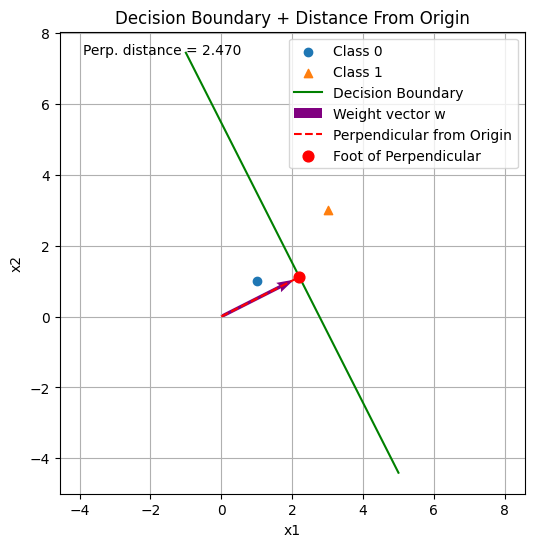

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# --- Extract trained parameters ---
w = trained_params["w"].reshape(-1)   # shape (2,)
w0 = float(trained_params["w_0"])

# --- Points used in training ---
X_pts = X.T          # shape (2,2) → two points
Y_pts = Y.flatten()  # (0,1)

# --- Distance computations ---
w_norm = np.linalg.norm(w)

# Signed distance from origin to the hyperplane
signed_dist = w0 / w_norm

# Absolute perpendicular distance
perp_dist = abs(signed_dist)

# Foot of perpendicular to the line:  ( -w0 / w||² ) * w
foot = -(w0 / (w_norm**2)) * w

print(f"‣ ||w = {w_norm:.6f}")
print(f"‣ Signed distance = {signed_dist:.6f}")
print(f"‣ Perpendicular distance = {perp_dist:.6f}")
print(f"‣ Foot of perpendicular = ({foot[0]:.4f}, {foot[1]:.4f})")

# --- Plot ---
plt.figure(figsize=(6,6))

# Data points (class 0 and class 1)
plt.scatter(X_pts[Y_pts==0, 0], X_pts[Y_pts==0, 1],
            label='Class 0', marker='o')
plt.scatter(X_pts[Y_pts==1, 0], X_pts[Y_pts==1, 1],
            label='Class 1', marker='^')

# --- Decision boundary: w1*x + w2*y + w0 = 0 ---
x_vals = np.linspace(-1, 5, 200)

if abs(w[1]) > 1e-12:  
    # Solve for y
    y_vals = -(w[0] * x_vals + w0) / w[1]
    plt.plot(x_vals, y_vals, 'g-', label='Decision Boundary')
else:
    # Vertical boundary
    x_line = -w0 / w[0]
    plt.axvline(x_line, color='g', label='Decision Boundary')

# --- Weight vector (normal to boundary) ---
plt.quiver(0, 0, w[0], w[1],
           angles='xy', scale_units='xy', scale=1,
           color='purple', label='Weight vector w')

# --- Perpendicular from origin to boundary ---
plt.plot([0, foot[0]], [0, foot[1]],
         'r--', label='Perpendicular from Origin')
plt.scatter([foot[0]], [foot[1]],
            s=60, color='red', zorder=5,
            label='Foot of Perpendicular')

# Annotation on plot
plt.text(0.05, 0.95,
         f"Perp. distance = {perp_dist:.3f}",
         transform=plt.gca().transAxes)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary + Distance From Origin")
plt.axis('equal')
plt.grid(True)
plt.legend(loc='best')
plt.show()